(690, 15) (690, 1)
   A15    A14 A13 A12  A11 A10 A9    A8 A7 A6 A5 A4     A3     A2 A1
0    0  202.0   g   f    1   t  t  1.25  v  w  g  u  0.000  30.83  b
1  560   43.0   g   f    6   t  t  3.04  h  q  g  u  4.460  58.67  a
2  824  280.0   g   f    0   f  t  1.50  h  q  g  u  0.500  24.50  a
3    3  100.0   g   t    5   t  t  3.75  v  w  g  u  1.540  27.83  b
4    0  120.0   s   f    0   f  t  1.71  v  w  g  u  5.625  20.17  b
  A16
0   +
1   +
2   +
3   +
4   +
A15     0
A14    13
A13     0
A12     0
A11     0
A10     0
A9      0
A8      0
A7      9
A6      9
A5      6
A4      6
A3      0
A2     12
A1     12
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     690 non-null    int64  
 1   A14     677 non-null    float64
 2   A13     690 non-null    object 
 3   A12     690 non-null    object 
 4   A11     690 non-null    int64  
 5  

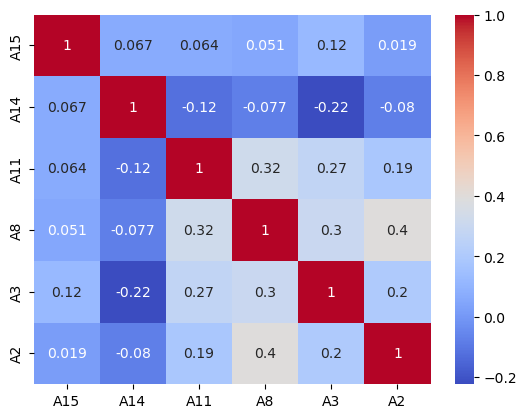

ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'g'

In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

# Fetch dataset
credit_approval = fetch_ucirepo(id=27)

# Data (as pandas dataframes)
X = credit_approval.data.features
y = credit_approval.data.targets

# Inspect the data
print(X.shape, y.shape)
print(X.head())
print(y.head())

# Check for missing values
print(X.isnull().sum())

# Data types and summary
print(X.info())
print(X.describe())

# Class distribution (target)
print(y.value_counts())

# Ensure X contains only numeric data for correlation
X_numeric = X.select_dtypes(include=[np.number])

# Plot heatmap of correlation matrix
sns.heatmap(X_numeric.corr(), annot=True, cmap="coolwarm")
plt.show()

# Data preprocessing
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encoding Categorical Variables
for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Standardisation/Normalisation
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Model Building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose a Model
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Model Evaluation
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"AUC = {auc(fpr, tpr):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.show()